# Import necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset

In [2]:

file_path = 'heart.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure

In [3]:

print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


# Separate features and target variable

In [4]:

X = df.drop('output', axis=1)  # Features
y = df['output']  # Target variable

# Split the dataset into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features

In [9]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier

In [12]:
%%time
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

CPU times: user 5.83 ms, sys: 2.3 ms, total: 8.14 ms
Wall time: 6.13 ms


# Evaluate the performance of the model

In [13]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')


Accuracy: 0.9016393442622951
Confusion Matrix:
[[27  2]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# Initialize the KNN classifier using manhattan distance 

In [14]:
%%time
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

CPU times: user 6.34 ms, sys: 3.05 ms, total: 9.39 ms
Wall time: 6.82 ms


# Evaluate the performance of the model using manhattan distance 

In [20]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')


Accuracy: 0.8360655737704918
Confusion Matrix:
[[24  5]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# Deploy Linear Regression For Concret Strength Prediciton

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'Concrete_Data_Yeh.csv'
df = pd.read_csv(file_path)

# Separate features and target variable
X = df.drop('csMPa', axis=1)
y = df['csMPa']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [25]:
# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)




In [26]:
# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 95.97094009110677
R-squared Score: 0.6275531792314851


In [28]:
linear_reg_model.coef_

array([ 0.11899393,  0.1085356 ,  0.08215181, -0.13527626,  0.31056994,
        0.01786715,  0.02409978,  0.11643864])

In [29]:
linear_reg_model.intercept_

-28.82355499969256

The code snippet [min(y_test), max(y_test)], [min(y_test), max(y_test)] is used to create a line representing the line of perfect predictions in the scatter plot. In other words, it's a line with a slope of 1 that goes from the minimum to the maximum value of the actual csMPa values.

The purpose of this line is to visualize how well the model's predictions align with perfect predictions. If the model's predictions are perfect, all the points would fall on this line. If the points deviate from this line, it indicates the model's prediction errors.

# Plot the predicted vs. actual values with a line indicating the relationship

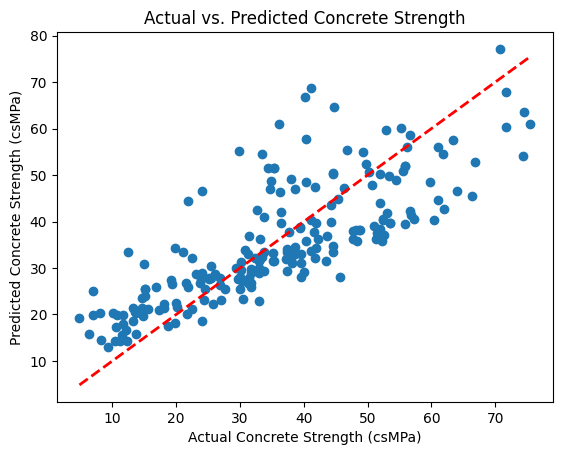

In [27]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Line of perfect predictions
plt.xlabel('Actual Concrete Strength (csMPa)')
plt.ylabel('Predicted Concrete Strength (csMPa)')
plt.title('Actual vs. Predicted Concrete Strength')
plt.show()